In [1]:
dataset = '/Users/andrii.p/Downloads/train 2.csv'
#https://www.kaggle.com/datasets/thedevastator/sms-spam-collection-a-more-diverse-dataset/

In [2]:
import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
import nltk 

## Завантажте набір текстових даних (з мітками класів). Проведіть передобробку даних (видаліть стоп-слова, пунктуацію)

In [3]:
data = pd.read_csv(dataset)

In [4]:
data.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [5]:
data

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1
5570,Will ü b going to esplanade fr home?\n,0
5571,"Pity, * was in mood for that. So...any other s...",0
5572,The guy did some bitching but I acted like i'd...,0


In [6]:
data_to_clear = data['sms'].values

In [7]:
data_to_clear.size

5574

In [8]:
nltk.download('stopwords')
stop_words = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andrii.p/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
def clean_text(text):
    text = text.lower()
    text = re.sub("@\S+", " ", text)
    text = re.sub("https*\S+", " ", text)
    text = re.sub("#\S+", " ", text)
    text = re.sub("\d", " ", text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\s{2,}',' ', text)
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    return text

In [10]:
clean_data = []

In [11]:
for text in data_to_clear:
     clean_data.append(clean_text(text))

In [12]:
data['sms']=clean_data

In [13]:
data.head()

,sms,label
0,go jurong point crazy available bugis n great ...,0
1,ok lar joking wif u oni,0
2,free entry wkly comp win fa cup final tkts st ...,1
3,u dun say early hor u c already say,0
4,nah think goes usf lives around though,0


## За допомогою wordcloud зробіть візуалізацію найбільш поширених слів або n-gram у кожному класі

In [14]:
conda install -c conda-forge wordcloud

done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.11.1
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.9.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install --upgrade Pillow

Note: you may need to restart the kernel to use updated packages.


In [16]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [17]:
text = " ".join(sms for sms in data.sms)

In [18]:
worldcloud = WordCloud(collocations=False,
                      background_color='white').generate(text)

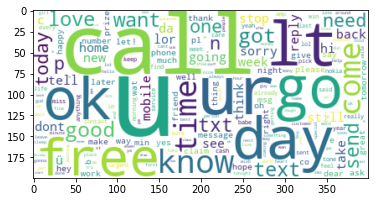

In [19]:
plt.imshow(worldcloud, interpolation='bilinear')

## Векторизуйте тексти (наприклад за допомогою sklearn.feature_extraction.text.TfidfVectorizer).

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [21]:
X = data["sms"]
y = data["label"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [23]:
vectorizer = TfidfVectorizer()
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

## Проведіть класифікацію текстових даних, зробіть оцінку якості. 

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
clf = MultinomialNB(alpha=0.1)
clf.fit(X_train_features, y_train)
y_pred = clf.predict(X_test_features)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1446
           1       0.97      0.85      0.91       227

    accuracy                           0.98      1673
   macro avg       0.97      0.92      0.95      1673
weighted avg       0.98      0.98      0.98      1673



In [27]:
print(confusion_matrix(y_test, y_pred))

[[1440    6]
 [  34  193]]
